In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import statistics as s

In [ ]:
torch.manual_seed(1)
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [ ]:
def load_data(train_batch_size, test_batch_size):
    # Fetch training data: total 60000 samples
    train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = True, download=True,
                       transform=transforms.Compose([
                           transforms.Resize((32, 32)),
                           transforms.ToTensor()
                       ])),
        batch_size = train_batch_size, shuffle=True)

    # Fetch test data: total 10000 samples
    test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('data', train = False, transform=transforms.Compose([
            transforms.Resize((32, 32)),
            transforms.ToTensor()
        ])),
        batch_size = test_batch_size, shuffle=True)

    return (train_loader, test_loader)

In [ ]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()

        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        # flatten as one dimension
        x = x.view(x.size()[0], -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))

        x = self.fc3(x)
        return x

In [ ]:
def define_optimizer(model):
    return optim.SGD(model.parameters(), lr=1e-2, momentum=0.9, nesterov=True)

In [ ]:
def train(model, optimizer, train_loader):
    model.train()

    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        optimizer.zero_grad()

        # Forward propagation
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()

In [ ]:
def calculate_loss(model, loader, loss_fn):
    correct = 0
    total = 0
    costTotal = 0
    costCounter = 0
    with torch.no_grad():
        for batch in loader:
            data, target = batch
            output = model(data)
            cost = loss_fn(output, target)
            costTotal += cost
            costCounter += 1
            for i, outputTensor in enumerate(output):
                if torch.argmax(outputTensor) == target[i]:
                    correct += 1
                total += 1
    return costTotal / costCounter, round(correct/total, 3)

In [ ]:
def compute(model, optimizer):
    loss_train_arr = []
    loss_test_arr = []
    test_acc_arr = []
    train_acc_arr = []
    for epoch in range(1, epochs + 1):
        train(model, optimizer, train_loader)
        tr_loss, tr_acc = calculate_loss(model, train_loader, loss_fn)
        t_loss, t_acc = calculate_loss(model, test_loader, loss_fn)
        print("Model Train loss: ", tr_loss)
        loss_train_arr.append(tr_loss)
        loss_test_arr.append(t_loss)
        train_acc_arr.append(tr_acc)
        test_acc_arr.append(t_acc)
    return loss_train_arr, loss_test_arr, train_acc_arr, test_acc_arr

In [ ]:
epochs = 30

### LR = 1e-3

In [ ]:
torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(500, 500)
model2 = CNN()
optimizer = define_optimizer(model2)
batch_2_train_loss, batch_2_test_loss, batch_2_train_acc, batch_2_test_acc = compute(model2, optimizer)

batch_param_2 = torch.nn.utils.parameters_to_vector(model2.parameters())

torch.manual_seed(1)
loss_fn = torch.nn.CrossEntropyLoss()
train_loader, test_loader = load_data(100, 100)
model1 = CNN()
optimizer = define_optimizer(model1)
batch_1_train_loss, batch_1_test_loss, batch_1_train_acc, batch_1_test_acc = compute(model1, optimizer)

batch_param_1 = torch.nn.utils.parameters_to_vector(model1.parameters())

Model Train loss:  tensor(1.4428)
Model Train loss:  tensor(0.2389)
Model Train loss:  tensor(0.1554)
Model Train loss:  tensor(0.1115)
Model Train loss:  tensor(0.0942)
Model Train loss:  tensor(0.0785)
Model Train loss:  tensor(0.0743)
Model Train loss:  tensor(0.0619)
Model Train loss:  tensor(0.0559)
Model Train loss:  tensor(0.0521)
Model Train loss:  tensor(0.0501)
Model Train loss:  tensor(0.0415)
Model Train loss:  tensor(0.0416)
Model Train loss:  tensor(0.0451)
Model Train loss:  tensor(0.0378)
Model Train loss:  tensor(0.0351)
Model Train loss:  tensor(0.0306)
Model Train loss:  tensor(0.0289)
Model Train loss:  tensor(0.0309)
Model Train loss:  tensor(0.0260)
Model Train loss:  tensor(0.0257)
Model Train loss:  tensor(0.0271)
Model Train loss:  tensor(0.0219)
Model Train loss:  tensor(0.0212)
Model Train loss:  tensor(0.0213)
Model Train loss:  tensor(0.0184)
Model Train loss:  tensor(0.0194)
Model Train loss:  tensor(0.0179)
Model Train loss:  tensor(0.0171)
Model Train lo

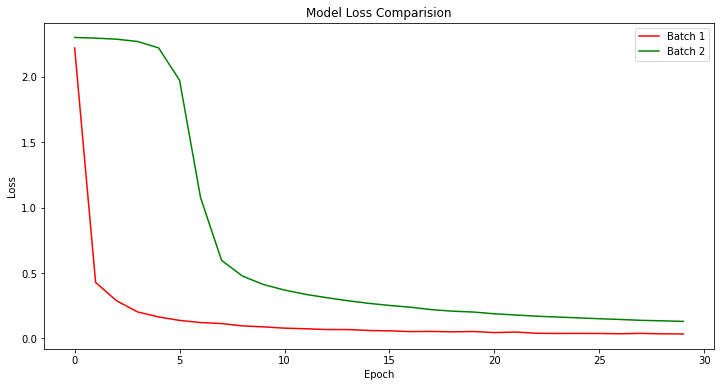

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

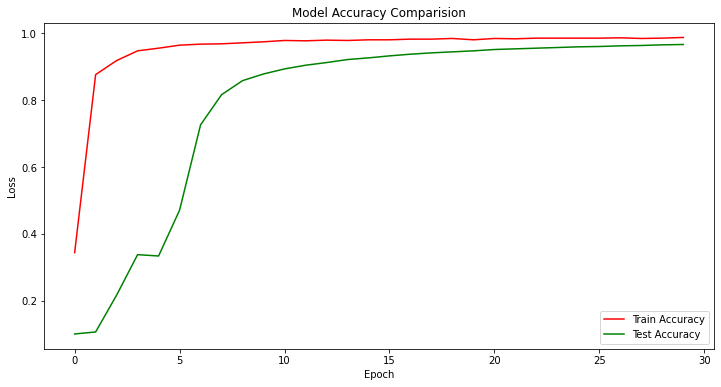

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [ ]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [ ]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

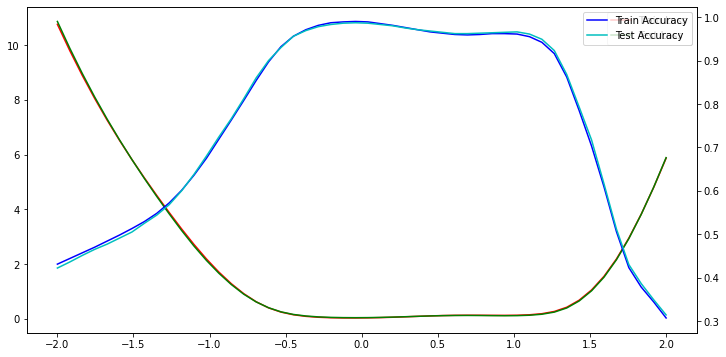

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])

### Batch Size 100 & 1000 LR = 1e-3

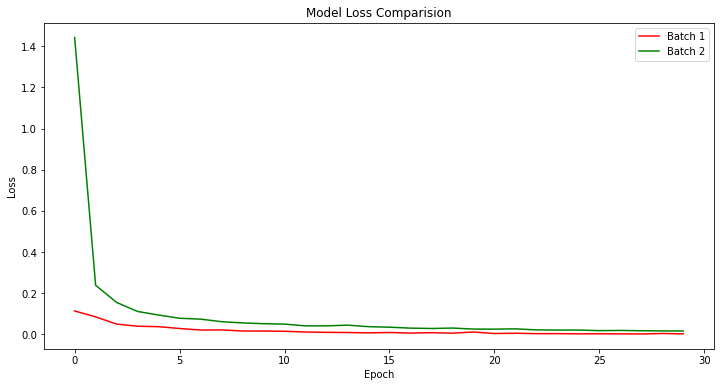

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_train_loss, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_train_loss, color = "g")
plt.title('Model Loss Comparision')
plt.legend(['Batch 1', 'Batch 2'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

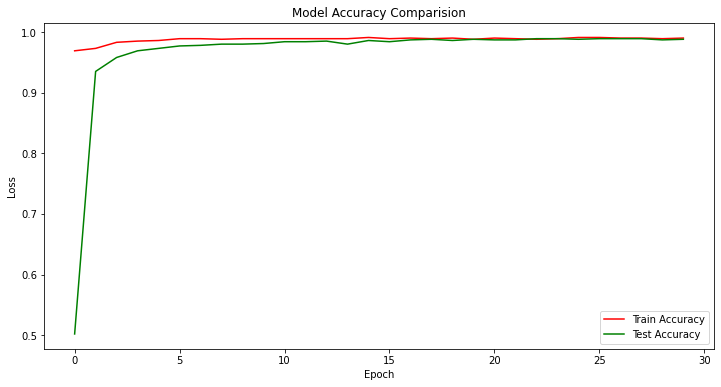

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(np.arange(0, 30, 1), batch_1_test_acc, color = "r")
plt.plot(np.arange(0, 30, 1), batch_2_test_acc, color = "g")
plt.title('Model Accuracy Comparision')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [ ]:
alpha = np.linspace(-2.0, 2.0, num = 50)
thetaArr =[]
for i in range (len(alpha)):
    theta = (1-alpha[i])*batch_param_1 + alpha[i]* batch_param_2
    thetaArr.append(theta)

In [ ]:
alpha_train_loss_arr = []
alpha_test_loss_arr = []
alpha_train_acc_arr = []
alpha_test_acc_arr = []

In [ ]:
for i in range (len(thetaArr)):
    torch.manual_seed(1)
    theta = (1-alpha[i])* batch_param_1 + alpha[i]*batch_param_2
    model = CNN()
    torch.nn.utils.vector_to_parameters(theta, model.parameters())
    loss_func = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(model.parameters(), lr=0.0004, weight_decay = 1e-4)

    temp = []
    for param in model.parameters():
        temp.append(torch.numel(param))

    alpha_train_loss, alpha_train_acc = calculate_loss(model, train_loader, loss_fn)
    alpha_test_loss, alpha_test_acc = calculate_loss(model, test_loader, loss_fn)
    alpha_train_loss_arr.append(alpha_train_loss)
    alpha_train_acc_arr.append(alpha_train_acc)
    alpha_test_loss_arr.append(alpha_test_loss)
    alpha_test_acc_arr.append(alpha_test_acc)

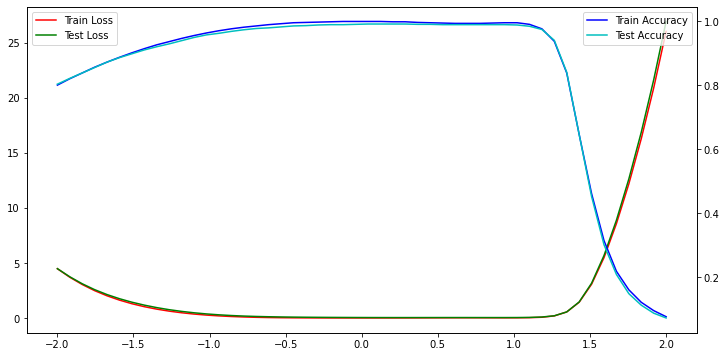

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(alpha, alpha_train_loss_arr, color = "r")
plt.plot(alpha, alpha_test_loss_arr, color = "g")
plt.legend(['Train Loss' , 'Test Loss'])

plt.twinx()

plt.plot(alpha, alpha_train_acc_arr, color = "b")
plt.plot(alpha, alpha_test_acc_arr, color = "c")
plt.legend(['Train Accuracy' , 'Test Accuracy'])